In [66]:
# importing nescessary libabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [67]:
# Load the CSV file
data_df = pd.read_csv('flowty_loan_indexer.csv')

# Removing invalid data from the csv , this usually happens with the last row of every csv you download from Flipside
data_df = data_df[data_df['LISTING_DATE'] != "\ufeff"]


In [68]:
# Check the shape of the dataset
print(data_df.shape)

(1064, 32)


In [69]:
# Get basic statistics
print(data_df.describe())

       LISTINGRESOURCEID         AMOUNT  AMOUNT_IN_USD  EXPIRESAFTER_IN_DAYS  \
count       1.064000e+03    1064.000000    1064.000000                1064.0   
mean        1.035179e+09     924.920141     920.735324                  30.0   
std         1.537476e+08    8157.189821    8156.601571                   0.0   
min         8.227514e+08       5.000000       2.175470                  30.0   
25%         8.828644e+08      44.500000      43.013537                  30.0   
50%         1.007217e+09     229.000000     230.000000                  30.0   
75%         1.195178e+09     531.250000     537.695106                  30.0   
max         1.269573e+09  248000.000000  248000.000000                  30.0   

       FLOWTYSTOREFRONTID  INTERESTRATE_IN_PERCENT         NFTID  ROYALTYRATE  \
count        1.064000e+03              1064.000000  1.064000e+03  1064.000000   
mean         2.699390e+08                16.866696  1.498669e+07     2.369831   
std          2.523106e+08           

In [70]:
# Check data types
print(data_df.dtypes)

LISTING_DATE                         object
LISTING_EXPIRY_DATE                  object
LISTINGRESOURCEID                   float64
AMOUNT                              float64
AMOUNT_IN_USD                       float64
ENABLEDAUTOREPAYMENT                 object
EXPIRESAFTER_IN_DAYS                float64
FLOWTYSTOREFRONTADDRESS              object
FLOWTYSTOREFRONTID                  float64
INTERESTRATE_IN_PERCENT             float64
NFTID                               float64
NFTTYPE                              object
PAYMENTTOKENTYPE                     object
ROYALTYRATE                         float64
TERM_IN_DAYS                        float64
FUNDING_DATE                         object
LOAN_SETTLEMENT_DATE                 object
FUNDINGRESOURCEID                   float64
EXPECTEDREPAYMENTAMOUNT             float64
EXPECTED_REPAYMENT_AMOUNT_IN_USD    float64
BORROWER                             object
LENDER                               object
ISFUNDED                        

In [71]:
# Convert date-related columns to datetime format
date_columns = [
    'LISTING_DATE', 'LISTING_EXPIRY_DATE', 'FUNDING_DATE', 
    'LOAN_SETTLEMENT_DATE', 'LIQUDATION_DATE', 'REPAYMENT_DATE'
]

for column in date_columns:
    data_df[column] = pd.to_datetime(data_df[column])

# Verify the changes by checking the data types again
print(data_df.dtypes)

LISTING_DATE                        datetime64[ns]
LISTING_EXPIRY_DATE                 datetime64[ns]
LISTINGRESOURCEID                          float64
AMOUNT                                     float64
AMOUNT_IN_USD                              float64
ENABLEDAUTOREPAYMENT                        object
EXPIRESAFTER_IN_DAYS                       float64
FLOWTYSTOREFRONTADDRESS                     object
FLOWTYSTOREFRONTID                         float64
INTERESTRATE_IN_PERCENT                    float64
NFTID                                      float64
NFTTYPE                                     object
PAYMENTTOKENTYPE                            object
ROYALTYRATE                                float64
TERM_IN_DAYS                               float64
FUNDING_DATE                        datetime64[ns]
LOAN_SETTLEMENT_DATE                datetime64[ns]
FUNDINGRESOURCEID                          float64
EXPECTEDREPAYMENTAMOUNT                    float64
EXPECTED_REPAYMENT_AMOUNT_IN_US

In [72]:
# Function to check if a date string is valid
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str)
        return True
    except:
        return False

# Identify invalid date formats in each date column
invalid_date_rows = {}

for column in date_columns:
    invalid_rows = data_df[~data_df[column].apply(is_valid_date)]
    if not invalid_rows.empty:
        invalid_date_rows[column] = invalid_rows[[column]]

invalid_date_rows

{}

In [73]:
# Check for missing values
missing_values = data_df.isnull().sum()
print(missing_values)

LISTING_DATE                          0
LISTING_EXPIRY_DATE                   0
LISTINGRESOURCEID                     0
AMOUNT                                0
AMOUNT_IN_USD                         0
ENABLEDAUTOREPAYMENT                  0
EXPIRESAFTER_IN_DAYS                  0
FLOWTYSTOREFRONTADDRESS               0
FLOWTYSTOREFRONTID                    0
INTERESTRATE_IN_PERCENT               0
NFTID                                 0
NFTTYPE                               0
PAYMENTTOKENTYPE                      0
ROYALTYRATE                           0
TERM_IN_DAYS                          0
FUNDING_DATE                        665
LOAN_SETTLEMENT_DATE                665
FUNDINGRESOURCEID                   665
EXPECTEDREPAYMENTAMOUNT             665
EXPECTED_REPAYMENT_AMOUNT_IN_USD    665
BORROWER                            665
LENDER                              665
ISFUNDED                              0
LIQUDATION_DATE                     993
LIQUIDATEDAMOUNT                    993


In [74]:
# Handling Funding-Related Columns
data_df.loc[:, 'FUNDING_DATE'].fillna('2099-01-01', inplace=True)  # Placeholder date
data_df.loc[:, 'LOAN_SETTLEMENT_DATE'].fillna('2099-01-01', inplace=True)
data_df.loc[:, ['FUNDINGRESOURCEID', 'EXPECTEDREPAYMENTAMOUNT', 'EXPECTED_REPAYMENT_AMOUNT_IN_USD']].fillna(-1, inplace=True)
data_df.loc[:, ['BORROWER', 'LENDER']].fillna('Unfunded', inplace=True)

# Handling Liquidation-Related Columns
data_df.loc[:, 'LIQUDATION_DATE'].fillna('2099-01-01', inplace=True) 
data_df.loc[:, ['LIQUIDATEDAMOUNT', 'LIQUIDATED_AMOUNT_IN_USD']].fillna(-1, inplace=True)

# Handling Repayment-Related Columns
data_df.loc[:, 'REPAYMENT_DATE'].fillna('2099-01-01', inplace=True)
data_df.loc[:, ['REPAIDAMOUNT', 'REPAID_AMOUNT_IN_USD']].fillna(-1, inplace=True)



In [75]:
# Handling the non-date columns
columns_to_fill_with_minus_one = [
    'FUNDINGRESOURCEID', 'EXPECTEDREPAYMENTAMOUNT', 
    'EXPECTED_REPAYMENT_AMOUNT_IN_USD', 'LIQUIDATEDAMOUNT', 
    'LIQUIDATED_AMOUNT_IN_USD', 'REPAIDAMOUNT', 'REPAID_AMOUNT_IN_USD'
]

for column in columns_to_fill_with_minus_one:
    data_df[column].fillna(-1, inplace=True)

data_df['BORROWER'].fillna('Unfunded', inplace=True)
data_df['LENDER'].fillna('Unfunded', inplace=True)

# Check for missing values again
missing_values_updated = data_df.isnull().sum()
missing_values_updated

LISTING_DATE                        0
LISTING_EXPIRY_DATE                 0
LISTINGRESOURCEID                   0
AMOUNT                              0
AMOUNT_IN_USD                       0
ENABLEDAUTOREPAYMENT                0
EXPIRESAFTER_IN_DAYS                0
FLOWTYSTOREFRONTADDRESS             0
FLOWTYSTOREFRONTID                  0
INTERESTRATE_IN_PERCENT             0
NFTID                               0
NFTTYPE                             0
PAYMENTTOKENTYPE                    0
ROYALTYRATE                         0
TERM_IN_DAYS                        0
FUNDING_DATE                        0
LOAN_SETTLEMENT_DATE                0
FUNDINGRESOURCEID                   0
EXPECTEDREPAYMENTAMOUNT             0
EXPECTED_REPAYMENT_AMOUNT_IN_USD    0
BORROWER                            0
LENDER                              0
ISFUNDED                            0
LIQUDATION_DATE                     0
LIQUIDATEDAMOUNT                    0
LIQUIDATED_AMOUNT_IN_USD            0
ISLIQUIDATED

 Exploratory Data Analysis (EDA) and Visualization:

In [76]:
data_summary = data_df.describe(include='all')
print(data_summary)

                         LISTING_DATE            LISTING_EXPIRY_DATE  \
count                            1064                           1064   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2023-05-03 20:00:25.289473536  2023-07-22 08:08:32.507518720   
min               2023-01-01 00:31:00            2023-01-10 04:20:03   
25%        2023-02-08 21:45:25.500000            2023-05-24 23:55:39   
50%               2023-05-06 02:38:32            2023-07-16 02:03:13   
75%        2023-07-26 18:37:50.500000  2023-09-27 13:32:13.750000128   
max               2023-09-14 07:05:39            2024-01-08 15:49:52   
std                               NaN                            NaN   

        LISTINGRESOURCEID         AMOUNT  AMOUNT_IN_USD ENABLEDAUTOREPAYMENT  \
count        1.064000e+03    1064.000000    1064.000000

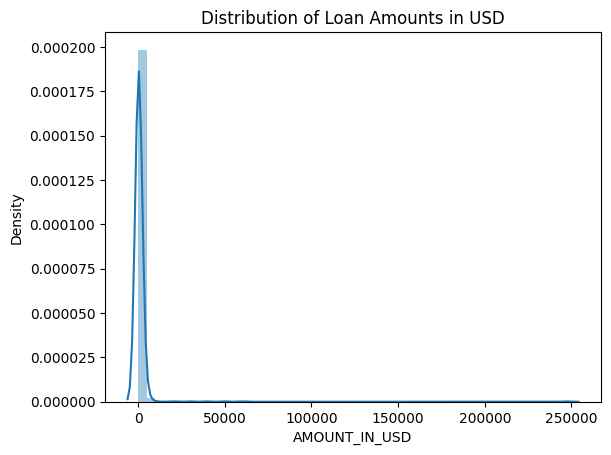

In [77]:
# Distribution of Loan Amounts

sns.distplot(data_df['AMOUNT_IN_USD'], kde=True)
plt.title('Distribution of Loan Amounts in USD')
plt.show()


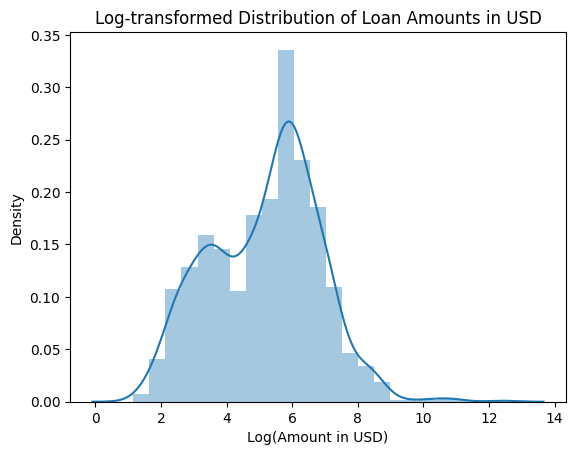

In [78]:
# Since outliers were too much we did log transformation of the data
# Apply log transformation to the data
log_amount = np.log1p(data_df['AMOUNT_IN_USD'])  # log1p is used to handle zero values

sns.distplot(log_amount, kde=True)
plt.title('Log-transformed Distribution of Loan Amounts in USD')
plt.xlabel('Log(Amount in USD)')
plt.show()


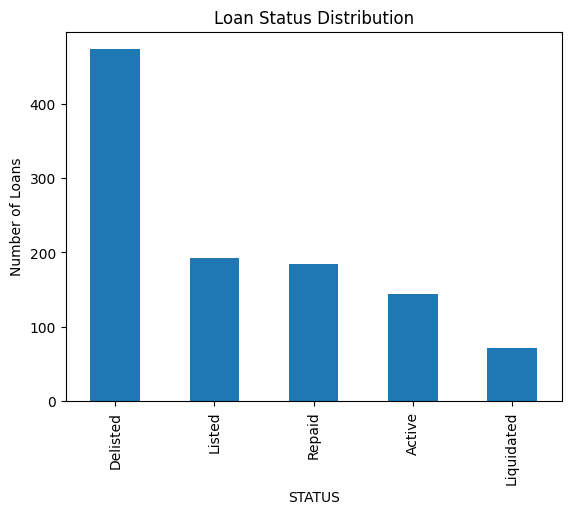

In [79]:
# Loan Status Distribution
status_counts = data_df['STATUS'].value_counts()
status_counts.plot(kind='bar')
plt.title('Loan Status Distribution')
plt.ylabel('Number of Loans')
plt.show()

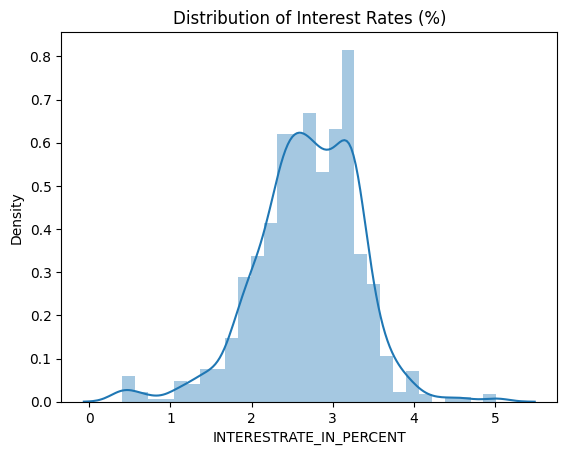

In [80]:

log_amount_ir = np.log1p(data_df['INTERESTRATE_IN_PERCENT'])  # log1p is used to handle zero values


sns.distplot(log_amount_ir, kde=True)
plt.title('Distribution of Interest Rates (%)')
plt.show()

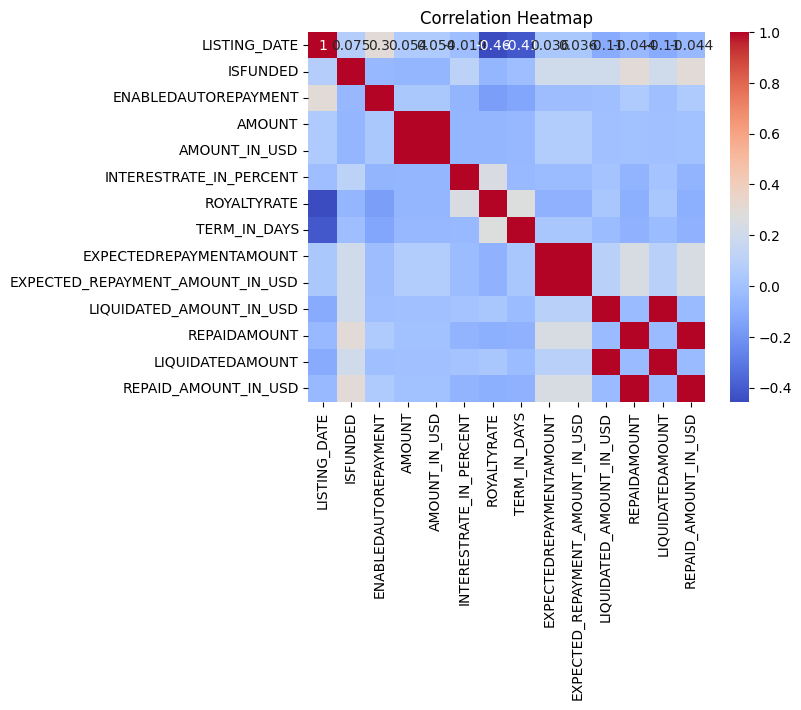

In [81]:
corr_columns = [
    'LISTING_DATE', 'ISFUNDED', 'ENABLEDAUTOREPAYMENT',  'AMOUNT', 'AMOUNT_IN_USD', 
    'INTERESTRATE_IN_PERCENT', 'ROYALTYRATE', 'TERM_IN_DAYS', 'EXPECTEDREPAYMENTAMOUNT', 
    'EXPECTED_REPAYMENT_AMOUNT_IN_USD', 'LIQUIDATED_AMOUNT_IN_USD', 
    'REPAIDAMOUNT',  'LIQUIDATEDAMOUNT', 'REPAID_AMOUNT_IN_USD'
]
correlation_matrix = data_df[corr_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show() 

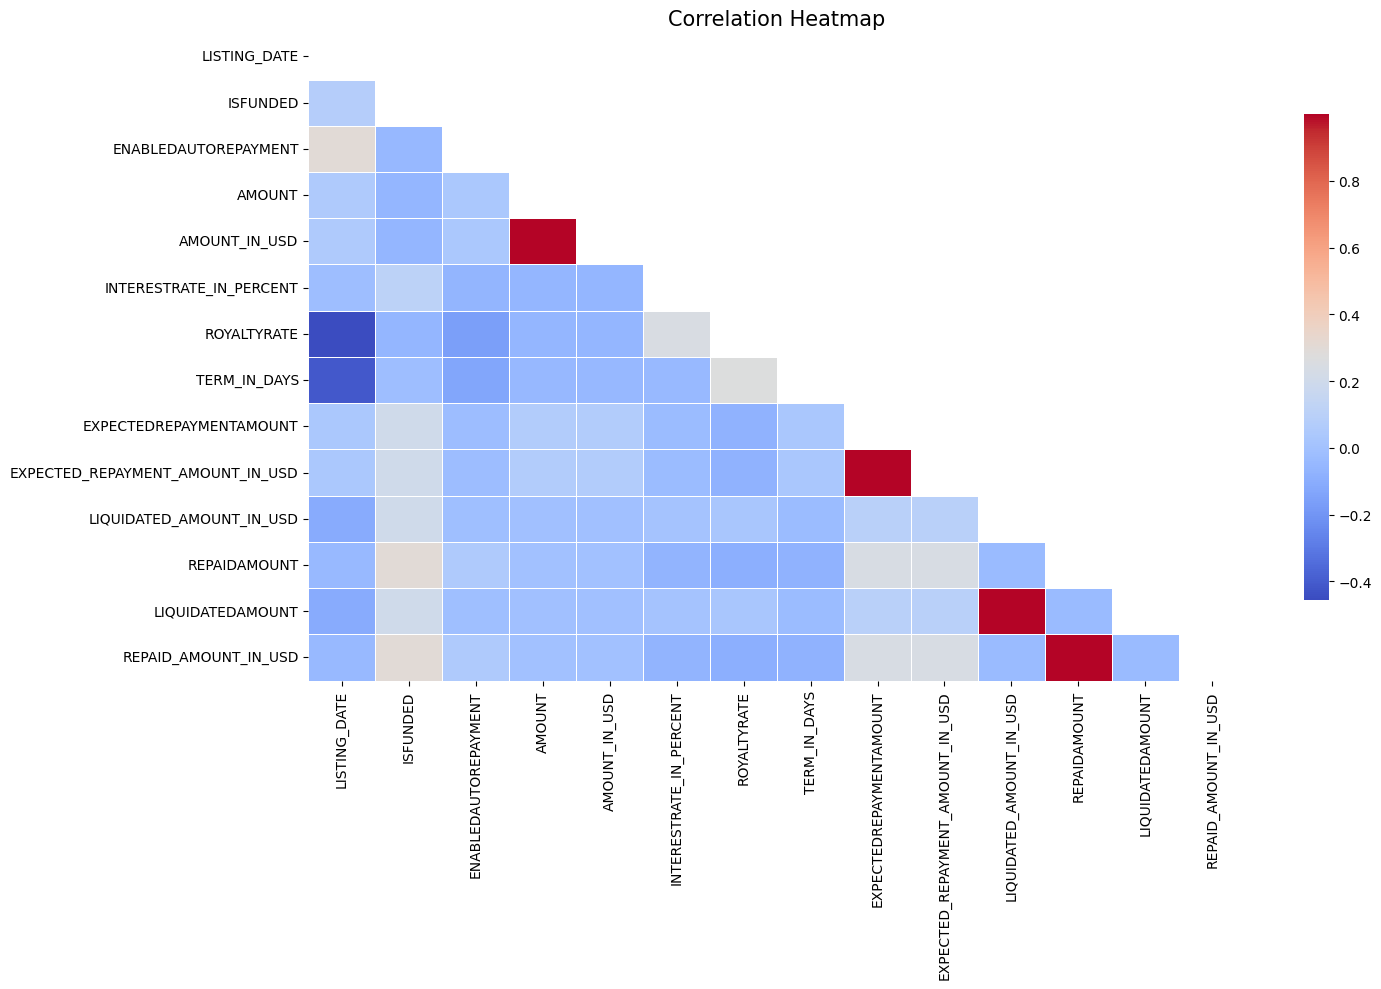

In [82]:
# Correlation Matrix with better formatting 
plt.figure(figsize=(15, 10))

# Mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Setting up the seaborn heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            mask=mask, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.75})

plt.title('Correlation Heatmap', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


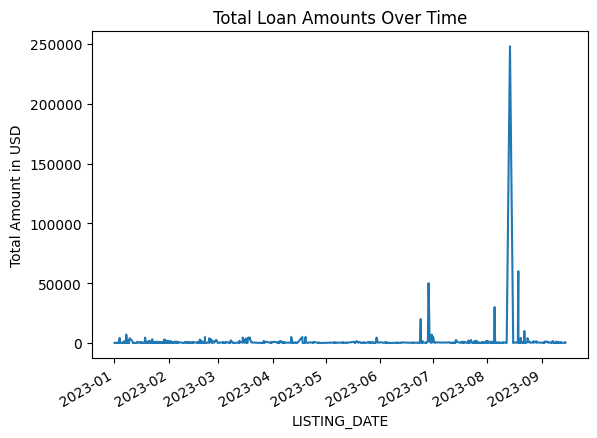

In [83]:
# Example: Total loan amounts over time
time_series_data = data_df.groupby('LISTING_DATE')['AMOUNT_IN_USD'].sum()
time_series_data.plot()
plt.title('Total Loan Amounts Over Time')
plt.ylabel('Total Amount in USD')
plt.show()

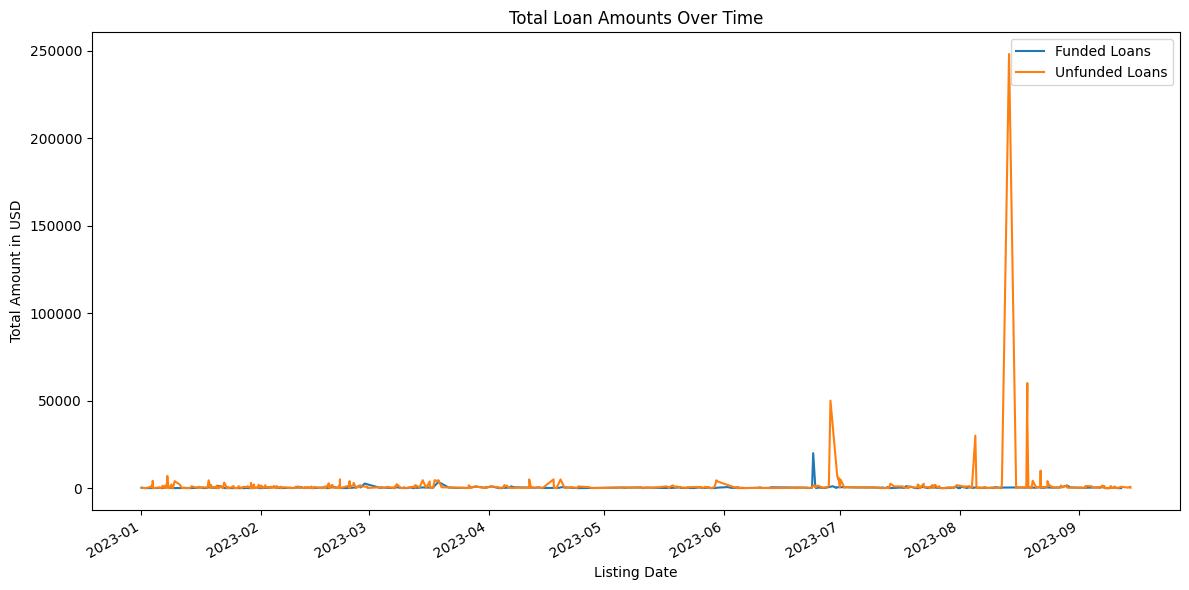

In [84]:
# Filter data for funded and unfunded loans
funded_loans = data_df[data_df['ISFUNDED'] == True]
unfunded_loans = data_df[data_df['ISFUNDED'] == False]

# Group by LISTING_DATE and sum the AMOUNT_IN_USD
time_series_funded = funded_loans.groupby('LISTING_DATE')['AMOUNT_IN_USD'].sum()
time_series_unfunded = unfunded_loans.groupby('LISTING_DATE')['AMOUNT_IN_USD'].sum()

# Plot
plt.figure(figsize=(12, 6))
time_series_funded.plot(label='Funded Loans')
time_series_unfunded.plot(label='Unfunded Loans')
plt.title('Total Loan Amounts Over Time')
plt.ylabel('Total Amount in USD')
plt.xlabel('Listing Date')
plt.legend()
plt.tight_layout()
plt.show()


In [85]:
# Check for missing values
missing_values = data_df.isnull().sum()
print(missing_values)

LISTING_DATE                        0
LISTING_EXPIRY_DATE                 0
LISTINGRESOURCEID                   0
AMOUNT                              0
AMOUNT_IN_USD                       0
ENABLEDAUTOREPAYMENT                0
EXPIRESAFTER_IN_DAYS                0
FLOWTYSTOREFRONTADDRESS             0
FLOWTYSTOREFRONTID                  0
INTERESTRATE_IN_PERCENT             0
NFTID                               0
NFTTYPE                             0
PAYMENTTOKENTYPE                    0
ROYALTYRATE                         0
TERM_IN_DAYS                        0
FUNDING_DATE                        0
LOAN_SETTLEMENT_DATE                0
FUNDINGRESOURCEID                   0
EXPECTEDREPAYMENTAMOUNT             0
EXPECTED_REPAYMENT_AMOUNT_IN_USD    0
BORROWER                            0
LENDER                              0
ISFUNDED                            0
LIQUDATION_DATE                     0
LIQUIDATEDAMOUNT                    0
LIQUIDATED_AMOUNT_IN_USD            0
ISLIQUIDATED